In [87]:
import pandas as pd
import numpy as np
import seaborn as sb
from colormath.color_objects import LabColor, HSVColor, AdobeRGBColor
from colormath.color_conversions import convert_color
from colormath.color_diff import delta_e_cie2000 as deltaE
data = pd.read_csv("Color Right - Excel.csv")

In [100]:
def color(rgbhex):
    return 'background-color: %s' % rgbhex

In [105]:
data['colorHex'] = data.apply(lambda row: AdobeRGBColor(row['R'], row['G'], row['B']).get_rgb_hex(),axis=1)

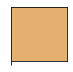

In [88]:
starting_point = AdobeRGBColor(228,176,112,is_upscaled=True)
color_history = [starting_point.get_rgb_hex()]
sb.palplot(color_history) #seaborns palette plot is the fastest way to see colors

#### Eww.  We didn't like this one at all.

It's too gray and too orange.  We wanted more yellow color.

#### First conversion - RGB -> HSV

In [89]:
starting_point_hsv = convert_color(starting_point, HSVColor)
starting_point_hsv.get_value_tuple()


(33.10344827586209, 0.5087719298245614, 0.8941176470588236)

To make this more yellow and less red/orange, the first step is to adjust the hue angle.  Let's add 10 or so and see how it looks

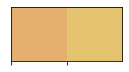

In [90]:
H,S,V = starting_point_hsv.get_value_tuple()
second_point_hsv = HSVColor(H+10,S,V)
second_point_rgb = convert_color(second_point_hsv,AdobeRGBColor)
color_history.append(second_point_rgb.get_rgb_hex())
sb.palplot(color_history)

Definitely in the right direction but maybe too dark?

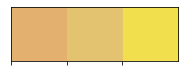

In [91]:
H,S,L = second_point_hsv.get_value_tuple()
third_point_hsv = HSVColor(H,S,.99)
third_point_rgb = convert_color(third_point_hsl,AdobeRGBColor)
color_history.append(third_point_rgb.get_rgb_hex())
sb.palplot(color_history)

Uh oh!  That's way too mustardy, let's dial back the saturation

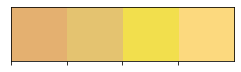

In [92]:
H,S,L = third_point_hsv.get_value_tuple()
fourth_point_hsl = HSVColor(H,.5,L)
fourth_point_rgb = convert_color(fourth_point_hsl,AdobeRGBColor)
color_history.append(fourth_point_rgb.get_rgb_hex())
sb.palplot(color_history)

I think we have a winner!

Now let's find the color that most closely matches that color

In [93]:
target_lab = convert_color(fourth_point_hsl, LabColor)
target_lab

LabColor(lab_l=87.90606002266718,lab_a=1.2341656904393261,lab_b=48.92256512676667)

In [109]:
data['dist_from_target'] = data.apply(lambda row: deltaE(LabColor(row['L'],row['a'],row['b']),target_lab),axis=1)
data.sort_values(by='dist_from_target').style.applymap(color,subset=['colorHex'])

Let's look at the top 5 colors in a palplot

In [106]:
data.style.applymap(color,subset=['colorHex'])